# AirBnB hosting: all it's cracked up to be?
## Analytics report and research proposal

By Cindy Barrientos

### Introduction
(((Describe the problem)))
...
....
.....

 http://insideairbnb.com/get-the-data.html
     https://www.apartmentlist.com/rentonomics/rental-price-data/

theme: report for someone wanting to build a side income renting out airbnb in Portland, OR

1. how much can one expect to make on airbnb?
    - how much can one make on airbnb (vs traditional renting)?
    - maybe some averages on cost per night, with the min and maxes
2. how can one maximize their profits on airbnb?
    - location: zip code seems to generally be a poor indicator, though, a further look will show a few to avoid for higher market prices
    - links between: neighborhood and price (are room types confounding? include this as 2nd variable to price?), number of reviews//reviews per month an price, room type and price, availability over the course of a year and price
3. is competition good or bad? do you want to add your listing to a more or less populated zipcode?
    - t test in price between the two zip codes
4. how much does it cost to pay off an apartment/house, how long would it take to pay off property with airbnb rentals?


1. Does location affect listing prices?

2. How can one maximize their profits on airbnb?

3. Can one expect a higher quality stay if they pay more?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
pd.options.display.max_columns=30

In [3]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams({'font.size': 22})

## AirBnB data
The following data was obtained from: http://insideairbnb.com/about.html

Inside AirBnB is an independent, non-commercial entity offering open source access to data that has been scraped from listings on the AirBnB website. Their offerings include detailed listing, calendar availability, reviews, and GeoJSON data. For the purposes here, only the detailed listings are used.

In [4]:
full_OR_airbnb = pd.read_csv('listings.csv.gz', compression='gzip')

In [5]:
full_OR_airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
full_OR_airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7893,https://www.airbnb.com/rooms/7893,20181107122123,2018-11-07,North Williams 2brm Home,"Located on Williams bike corridor, some of Por...",This NE Portland 2 bedroom home is located jus...,"Located on Williams bike corridor, some of Por...",none,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,10.0,10.0,10.0,10.0,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,flexible,f,f,1,0.02
1,12899,https://www.airbnb.com/rooms/12899,20181107122123,2018-11-07,"Alberta Arts 2 bedroom suite, charming 1906 house",Settle in to a space of your own. You'll have ...,We live in a neighborhood of beautiful gardens...,Settle in to a space of your own. You'll have ...,none,We're within walking distance of a grocery and...,We welcome musicians and even have a guitar fo...,Parking is readily available in front of our h...,"Guests have the whole upstairs, two bedrooms, ...",We let our guests determine their level of int...,Please no smoking. The space is not child-proo...,...,10.0,10.0,10.0,10.0,10.0,t,14-218887-000-00-HO,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,moderate,f,f,1,4.67
2,16688,https://www.airbnb.com/rooms/16688,20181107122123,2018-11-07,"Beautiful condo in downtown Pearl, NW Portland","Newly remodeled 2 bedroom (3 queen beds), 2 fu...","- Fully furnished condo with high ceilings, bi...","Newly remodeled 2 bedroom (3 queen beds), 2 fu...",none,Easily one of Portland’s most desirable neighb...,- Smoking is strictly prohibited - Must be abl...,"Walking distance to the public Light Rail, bus...",Our guests enjoy entire home to themselves. Di...,"Our guests can reach us via phone, text or email.",NaN,...,10.0,10.0,10.0,10.0,9.0,t,2008-190040-000-00-RS,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",t,f,moderate,f,f,1,2.37
3,25200,https://www.airbnb.com/rooms/25200,20181107122123,2018-11-07,Flamenco Dream :: hip mississippi ave.,"If you are an Urban Farming pioneer, enthusias...",The large farmhouse is surrounded by magical u...,"If you are an Urban Farming pioneer, enthusias...",none,Tierra Soul is located in the fun and hip Miss...,QUIET HOURS: (9pm -7am) We have guests from al...,"We are a 5 minute drive, and 10 minute MAX rid...",NaN,NaN,quiet-ish hours: 9pm - 7am this means we a...,...,9.0,10.0,10.0,10.0,9.0,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,f,f,6,0.33
4,26203,https://www.airbnb.com/rooms/26203,20181107122123,2018-11-07,Bluebird @ hip mississippi ave,"If you are an Urban Farming pioneer, enthusias...",The large farmhouse is surrounded by magical u...,"If you are an Urban Farming pioneer, enthusias...",none,We are located in the fun and hip Mississippi ...,QUIET HOURS: (9pm -7am) We have guests from al...,"We are a 5 minute drive, and 10 minute MAX rid...",NaN,NaN,quiet-ish hours: 9pm - 7am this means we a...,...,10.0,9.0,10.0,10.0,9.0,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,f,f,6,0.27


### Cleaning the data

There is more data here than is necessary for our purposes. Below, I will do a bit of data cleaning and refining to prepare for analytics, such as:
1. remove excess columns
2. fix price column such that the '%' and ',' symbols are dropped, then turn into a floating point
3. remove listings that are valued at greater than USD500/night

#### Removing excess column data

In [7]:
airbnb = full_OR_airbnb.drop(columns=['thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'host_total_listings_count', 'neighbourhood_group_cleansed', 
                                      'requires_license', 'license', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
                                      'calendar_last_scraped', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'street', 
                                      'host_verifications', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'scrape_id',
                                      'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
                                      'house_rules', 'picture_url', 'host_id', 'host_url', 'square_feet', 'weekly_price', 'monthly_price', 'neighbourhood', 'require_guest_profile_picture',                                              
                                      'require_guest_phone_verification', 'calculated_host_listings_count'])
airbnb.describe()

,id,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,5.317000e+03,5312.000000,5317.000000,5314.000000,5315.000000,5316.000000,5317.000000,5317.000000,5317.000000,5317.000000,4846.000000,4844.000000,4843.000000,4841.000000,4842.000000,4841.000000,4841.000000,4877.000000
mean,1.531575e+07,12.256589,3.435960,1.230335,1.359172,1.869451,1.811360,4.221930,489.343051,60.934173,96.931077,9.880058,9.784844,9.940921,9.932879,9.790126,9.739103,3.013443
std,8.481055e+06,114.287981,1.898449,0.510583,0.901567,1.230026,1.292145,10.049577,534.905799,81.961679,4.410958,0.426587,0.548327,0.302573,0.341687,0.477763,0.551386,2.920180
min,7.893000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000,2.000000,2.000000,5.000000,2.000000,4.000000,2.000000,0.010000
25%,7.959145e+06,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,6.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.780000
50%,1.625721e+07,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,90.000000,29.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.380000
75%,2.188217e+07,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1125.000000,84.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.450000
max,2.986167e+07,1305.000000,24.000000,5.000000,8.000000,16.000000,15.000000,222.000000,5000.000000,865.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,58.160000


In [8]:
airbnb.head()

,id,listing_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,property_type,...,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,7893,https://www.airbnb.com/rooms/7893,Jesse,2009-06-14,NaN,NaN,f,1.0,t,f,Piedmont,Portland,OR,97217,House,...,2,2010-02-22,2014-08-12,100.0,10.0,10.0,10.0,10.0,10.0,10.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,flexible,0.02
1,12899,https://www.airbnb.com/rooms/12899,Ali And David,2009-10-29,NaN,NaN,t,1.0,t,t,Concordia,Portland,OR,97211,Guest suite,...,500,2010-01-24,2018-10-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,moderate,4.67
2,16688,https://www.airbnb.com/rooms/16688,Ashish,2009-12-21,within an hour,100%,t,1.0,t,f,Pearl,Portland,OR,97209,House,...,44,2017-04-30,2018-11-04,97.0,10.0,10.0,10.0,10.0,10.0,9.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",t,f,moderate,2.37
3,25200,https://www.airbnb.com/rooms/25200,Garden,2010-04-05,within a few hours,100%,f,7.0,t,t,Humboldt,Portland,OR,97217,House,...,34,2010-06-07,2018-10-18,93.0,9.0,9.0,10.0,10.0,10.0,9.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,0.33
4,26203,https://www.airbnb.com/rooms/26203,Garden,2010-04-05,within a few hours,100%,f,7.0,t,t,Humboldt,Portland,OR,97217,House,...,28,2010-06-09,2018-09-30,92.0,9.0,10.0,9.0,10.0,10.0,9.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,0.27


There is still 43 columns of data.

#### Refining price data
First, to make the price data useable, I have to remove the symbols ('$' and ',') and set them as floats. Then, I'll check the integrity of the price data.

In [9]:
airbnb.price = [x.strip('$') for x in airbnb.price]
airbnb.price = airbnb.price.str.replace(',', '')

In [10]:
airbnb.dtypes
airbnb['price'] = airbnb['price'].astype('float')

Now that the prices are floating point integers, I'll look through some of the outliers

In [11]:
airbnb.price.max()

8400.0

I don't believe there is really an AirBnB listing available for $8400. As it turns out in searching the listing URL, the cost is 84/night:

In [12]:
full_OR_airbnb.loc[airbnb['price']==8400]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
836,4684661,https://www.airbnb.com/rooms/4684661,20181107122123,2018-11-07,Charming quiet bohemian getaway!,NaN,You have your own private entrance into the fl...,You have your own private entrance into the fl...,none,"A great place to walk around, fruit trees and ...",NaN,Public transportattion is nearby and I have un...,You have the entire upstairs which consists of...,Since I live in the house you have ready acces...,No Smoking - I have had new carpets put in as ...,...,10.0,10.0,10.0,10.0,10.0,t,15-131548-000-00-HO,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",t,f,moderate,f,f,1,3.42


In [13]:
airbnb.at[836, 'price'] = 84.00
airbnb.price.max()

2835.0

The next highest listing is no longer available so I cannot verify. There are a handful of listings today 12/18/2018 that are above USD1500, but they are meant as retreats or special events. Most people will not be able to utilize investment opportunities in such large and expensive properties, so I'll limit my data up to $500 per night.

In [14]:
airbnb = airbnb[airbnb['price']<=500]
airbnb.price.describe()

count    5285.000000
mean      110.112772
std        71.466615
min         0.000000
25%        65.000000
50%        90.000000
75%       129.000000
max       500.000000
Name: price, dtype: float64

In [15]:
airbnb.loc[airbnb['price']==0.00]

,id,listing_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,property_type,...,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
3576,20477753,https://www.airbnb.com/rooms/20477753,Leah,2012-04-24,within an hour,100%,t,2.0,t,f,Sumner,Portland,OR,97220,House,...,81,2017-08-23,2018-09-23,100.0,10.0,10.0,10.0,10.0,10.0,10.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,moderate,5.5


Another typo indicating the listing index 3576 above is not actually USD0.00 but rather $29.00 according to the current listing; will fix below:

In [16]:
airbnb.at[3576, 'price'] = 29.00
airbnb.price.min()

10.0

In [17]:
airbnb.loc[airbnb['price']<29.00]

,id,listing_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,property_type,...,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
32,114086,https://www.airbnb.com/rooms/114086,Teresa,2011-04-11,NaN,NaN,f,5.0,t,t,Sabin,Portland,OR,97211,House,...,54,2011-07-06,2017-11-18,89.0,9.0,9.0,10.0,10.0,10.0,9.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,0.60
61,236108,https://www.airbnb.com/rooms/236108,Teresa,2011-04-11,NaN,NaN,f,5.0,t,t,Sabin,Portland,OR,97211,House,...,55,2012-04-26,2018-10-21,91.0,9.0,9.0,10.0,9.0,10.0,9.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,0.69
117,573191,https://www.airbnb.com/rooms/573191,Deanna,2009-08-18,within a day,75%,f,1.0,t,f,Irvington,Portland,OR,97212,Apartment,...,134,2013-05-08,2017-07-23,87.0,9.0,8.0,9.0,10.0,9.0,9.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,flexible,2.00
822,4606687,https://www.airbnb.com/rooms/4606687,Sonja,2014-08-30,within a few hours,100%,f,2.0,t,f,Brentwood-Darlington,Portland,OR,97206,Bungalow,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",t,f,moderate,NaN
1055,6172997,https://www.airbnb.com/rooms/6172997,Monica-Sophie,2013-04-26,within a few hours,100%,f,6.0,t,f,Powellhurst-Gilbert,Portland,OR,97266,Townhouse,...,4,2015-05-16,2017-09-22,80.0,9.0,9.0,9.0,8.0,8.0,9.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,0.09
1776,11099643,https://www.airbnb.com/rooms/11099643,Aimie,2016-02-06,NaN,NaN,f,1.0,t,f,Montavilla,Portland,OR,97216,House,...,15,2016-02-20,2016-10-31,96.0,10.0,9.0,10.0,9.0,9.0,10.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,moderate,0.45
1807,11291213,https://www.airbnb.com/rooms/11291213,Michelle,2012-09-03,NaN,NaN,f,1.0,t,f,Buckman,Portland,OR,97214,Apartment,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,flexible,NaN
1828,11533779,https://www.airbnb.com/rooms/11533779,Monica-Sophie,2013-04-26,within a few hours,100%,f,6.0,t,f,Powellhurst-Gilbert,Portland,OR,97266,Townhouse,...,4,2016-04-24,2018-08-31,95.0,10.0,9.0,10.0,10.0,9.0,10.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,0.13
1848,11675192,https://www.airbnb.com/rooms/11675192,Monica-Sophie,2013-04-26,within a few hours,100%,f,6.0,t,f,Powellhurst-Gilbert,Portland,OR,97266,Townhouse,...,1,2016-04-12,2016-04-12,80.0,8.0,8.0,8.0,8.0,6.0,10.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,0.03
1956,12473284,https://www.airbnb.com/rooms/12473284,Fiona,2014-09-21,within an hour,100%,f,4.0,t,t,Sunnyside,Portland,OR,97214,House,...,114,2016-05-05,2018-10-23,85.0,9.0,8.0,9.0,9.0,10.0,9.0,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",t,f,moderate,3.73


The listings for USD10.00 seem to be incorrectly priced, though the random ones I checked above USD10.00 and below USD30.00 were correct. For this reason, I will drop the listings with USD10.00

In [18]:
airbnb = airbnb[airbnb['price']>10.00]

#### Refining location data
I need to define how I will separate the location data. I can use either neighborhoods, jurisdictions, or zipcode. In the following I'll look at the data to determine the best approach here.

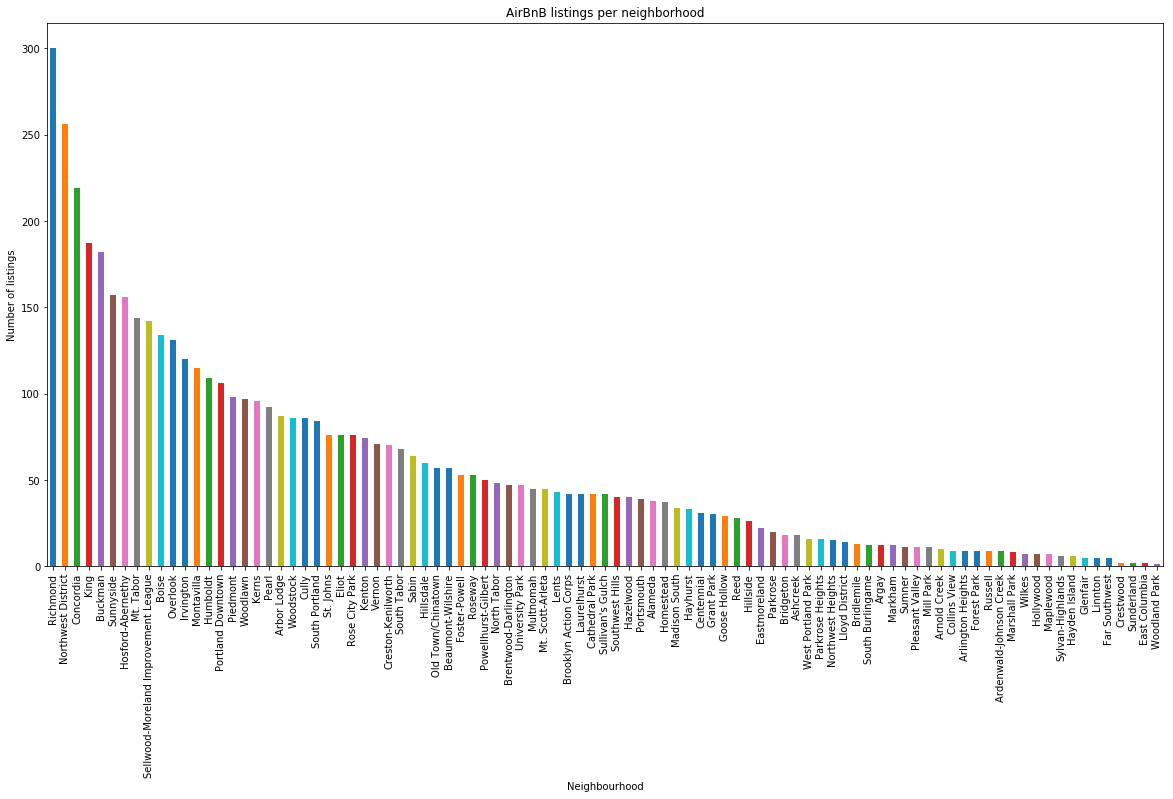

In [19]:
airbnb.neighbourhood_cleansed.value_counts().plot(kind="bar")
plt.xlabel('Neighbourhood')
plt.ylabel('Number of listings')
plt.title('AirBnB listings per neighborhood')
plt.show()

Lots of different neighborhood classifications. Might want to combine some of these for it to be of use, or use jurisdiction

In [20]:
airbnb.jurisdiction_names.value_counts()

{OREGON," MULTNOMAH"," PORTLAND"}                  5163
{OREGON}                                             93
{OREGON," MULTNOMAH"}                                 9
{OREGON," Washington County"," OR"}                   7
{OREGON," PORTLAND"}                                  3
{OREGON," Washington County"," OR"," PORTLAND"}       1
Name: jurisdiction_names, dtype: int64

Okay jurisdiction won't be useful either - almost everything is in Multnomah county. Let's get rid of that column data

In [21]:
airbnb = airbnb.drop(columns='jurisdiction_names')

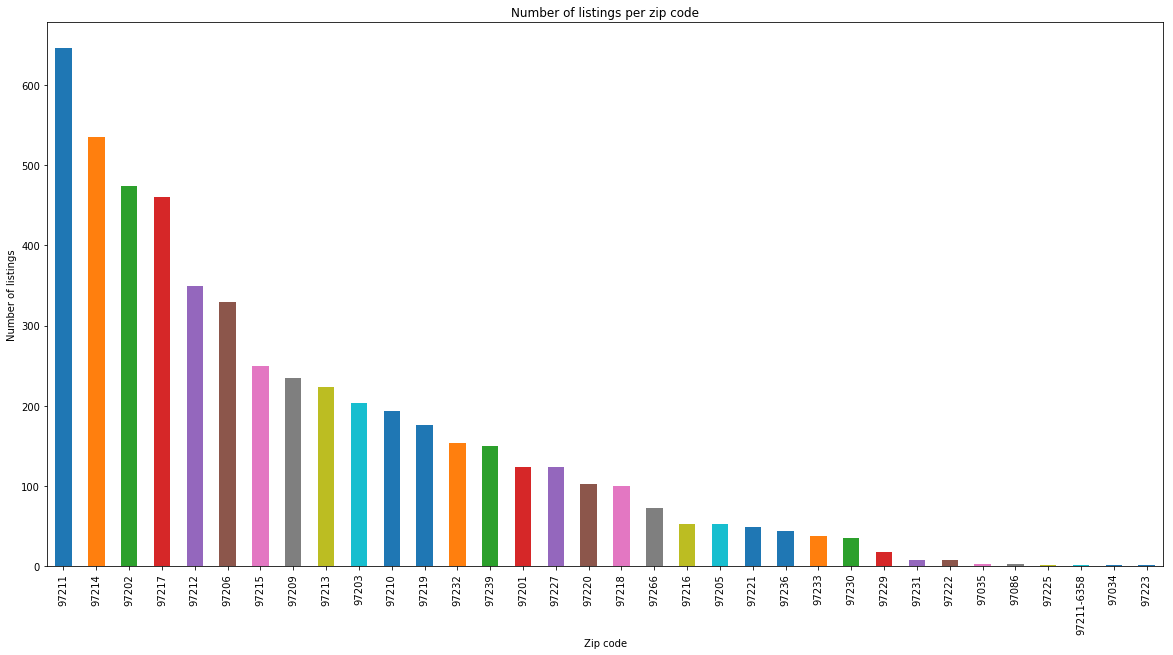

In [22]:
airbnb.zipcode.value_counts().plot(kind='bar')
plt.ylabel("Number of listings")
plt.xlabel("Zip code")
plt.title("Number of listings per zip code")
plt.show()

These have a more digestible amount of categories. I could even remove the last 10 or so because there isn't enough airbnb listings there, suggestings these are not tourist-heavy areas. The data would also be limited to analyze; there are only about 100 listings total in the last 12 zipcodes, so I'd hesitate to trust any conclusions. This leaves 23 different zipcode groupings.


Interestingly, the zip code with the highest rental listings is not what I would have suspected as it's not centered in the tourist area. This may be good for interested investors as it may not cost as much to obtain property outside of downtown (can test hypothesis with zillow data later)

Figure out MD code to insert image of Portland metro area with zip codes later: http://toursmaps.com/wp-content/uploads/2016/07/zip_code_map.jpg

In [23]:
airbnb[airbnb['zipcode']=='97086']

,id,listing_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,city,state,zipcode,property_type,...,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
2883,17605030,https://www.airbnb.com/rooms/17605030,Larry,2017-03-07,within a few hours,89%,f,1.0,t,f,Lents,Happy Valley,OR,97086,House,...,31,30,2017-05-22,2018-09-03,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,f,moderate,1.68
5254,29434425,https://www.airbnb.com/rooms/29434425,Kelly,2013-02-22,NaN,NaN,f,2.0,t,t,Lents,Happy Valley,OR,97086,House,...,60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,strict_14_with_grace_period,NaN


In [24]:
lesser_zipcodes = ['97034', '97211-6358', '97225', '97035', '97068', '97222', '97231', '97229', '97230', '97233', '97223', '97086']
airbnb = airbnb[-airbnb['zipcode'].isin(lesser_zipcodes)]

### Exploring the data: categorical variables
Does location affect listing price?

Now that we have our location variables defined and cleaned, we can determine if there are correlations between zipcode and price per night.

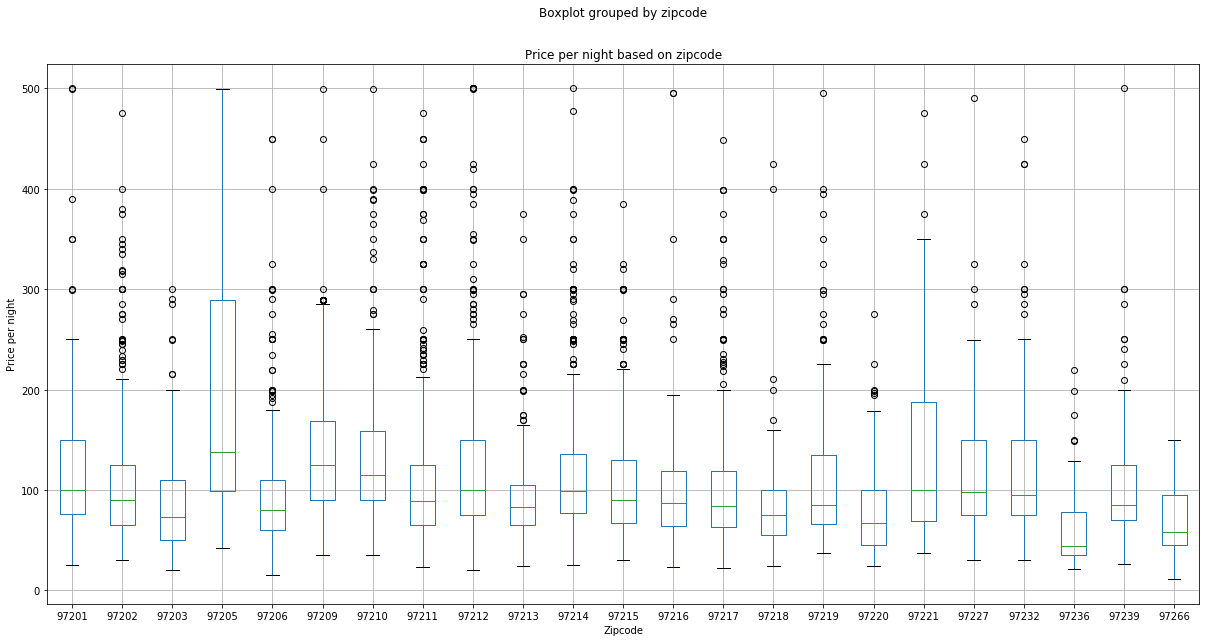

In [25]:
airbnb.boxplot(column='price', by='zipcode')
plt.ylabel("Price per night")
plt.xlabel("Zipcode")
plt.title("Price per night based on zipcode")
plt.show()

There is a large variability in price per night lodging by zipcode. Therefore, zipcode should not be a huge factor in setting up an AirBnB.

At this point, I will find the zip codes with the highest and lowest mean price and use a statistical test to determine if there is a real difference between the two groups to answer whether zip codes matter in listing higher prices

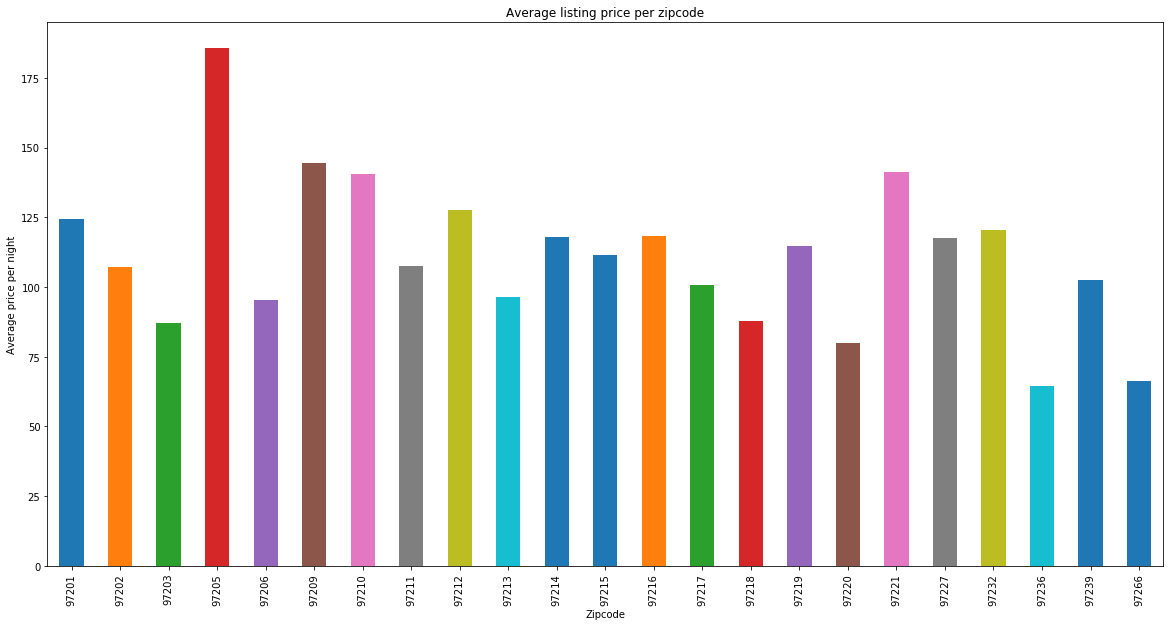

In [26]:
# Scan here for zipcodes with the highest and lowest mean listing price
airbnb.groupby('zipcode').price.mean().plot(kind='bar')
plt.ylabel("Average price per night")
plt.xlabel("Zipcode")
plt.title("Average listing price per zipcode")
plt.show()

In [27]:
prices_97205 = airbnb[airbnb['zipcode']=='97205'].price
prices_97236 = airbnb[airbnb['zipcode']=='97236'].price

As noted below, there are 44 and 52 listings contained in the zip codes to compare, which should be sufficient of a sample size to conduct statistical testing with.

In [28]:
prices_97205.shape

(52,)

In [29]:
prices_97236.shape

(44,)

I will now determine whether these two populations are normally distributed. If so, I can run a t-test to determine real differences between pricing in the two zip codes. If not, I will run a Mann-Whitney test that does not assume normality.

For the normal distribution test, I will use a QQ plot

In [30]:
norm_dist52 = np.random.normal(0, 1, 52)
norm_dist52.sort()

In [52]:
norm_dist44 = np.random.normal(0, 1, 44)
norm_dist44.sort()

In [48]:
prices_97205.sort_values()

3925     42.0
1816     47.0
3961     50.0
13       60.0
4450     79.0
4985     80.0
3909     80.0
974      80.0
4604     86.0
4163     89.0
1045     90.0
4412     93.0
5175     95.0
998     100.0
1010    100.0
4452    100.0
2313    102.0
4794    115.0
5196    120.0
1752    125.0
2356    129.0
2102    129.0
3104    130.0
4928    130.0
375     132.0
239     135.0
1885    140.0
3179    150.0
1252    175.0
3787    180.0
2906    225.0
5207    250.0
3615    250.0
4070    289.0
3302    289.0
3303    289.0
4531    289.0
4530    289.0
4529    289.0
4527    289.0
4528    289.0
3305    289.0
3306    289.0
3308    289.0
4082    289.0
4081    289.0
4071    289.0
3304    289.0
3307    289.0
1698    320.0
1096    320.0
2508    499.0
Name: price, dtype: float64

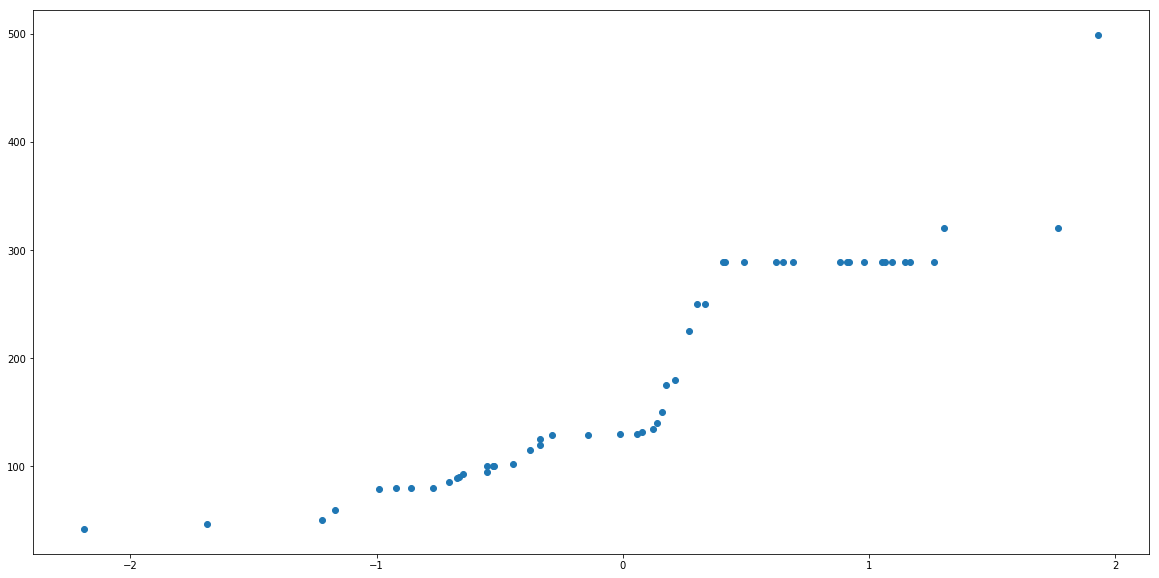

In [49]:
plt.plot(norm_dist52, prices_97205.sort_values(), "o")
plt.show()

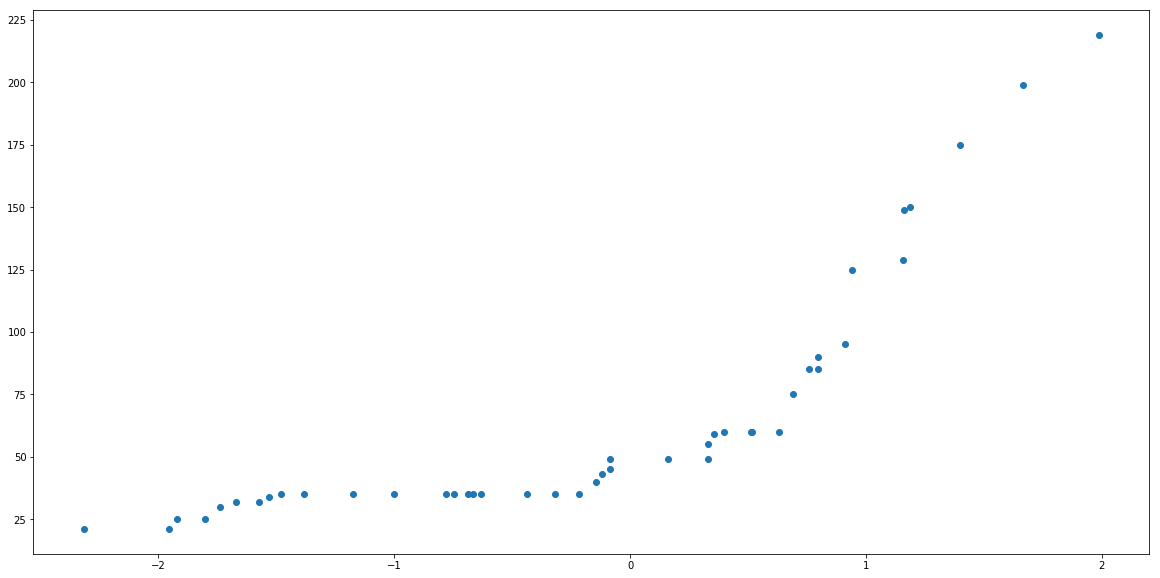

In [53]:
plt.plot(norm_dist44, prices_97236.sort_values(), "o")
plt.show()

Unfortunately, the zipcode groupings do not appear to be normally distributed, so I'm unable to use the t-test. Instead, I will conduct a Mann-Whitney U test to determine if there are real differences between the listing prices of the two zip codes 

In [50]:
from scipy.stats import mannwhitneyu

print(mannwhitneyu(prices_97205, prices_97236))

MannwhitneyuResult(statistic=254.5, pvalue=2.6976940168325013e-11)


The prices grouped by zipcode were highly variable, however, it seems that there are very significant differences between them. The Mann-Whitney U test comparing the zipcodes with the highest (97205) and lowest (97236) mean listing price per night indicates the difference between the means are 255 standard errors apart. The p-value is so small, we can be confident that there is a true difference between these two groups.

### Exploring the data: continuous variables
What parameters influence price? To answer this, I will first create a correlation heat map.

In [34]:
# separate out the continuous data into a new dataframe
airbnb_cont = airbnb[['id', 'price', 'host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
                              'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
                              'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                              'review_scores_value', 'reviews_per_month']].copy()
airbnb_cont.head()

,id,price,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,7893,175.0,1.0,3,1.0,2.0,2.0,1,3,30,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.02
1,12899,65.0,1.0,3,1.0,2.0,2.0,2,2,730,500,98.0,10.0,10.0,10.0,10.0,10.0,10.0,4.67
2,16688,275.0,1.0,8,2.0,2.0,3.0,6,2,365,44,97.0,10.0,10.0,10.0,10.0,10.0,9.0,2.37
3,25200,49.0,7.0,2,1.0,1.0,1.0,1,7,1125,34,93.0,9.0,9.0,10.0,10.0,10.0,9.0,0.33
4,26203,49.0,7.0,2,1.0,1.0,1.0,1,3,1125,28,92.0,9.0,10.0,9.0,10.0,10.0,9.0,0.27


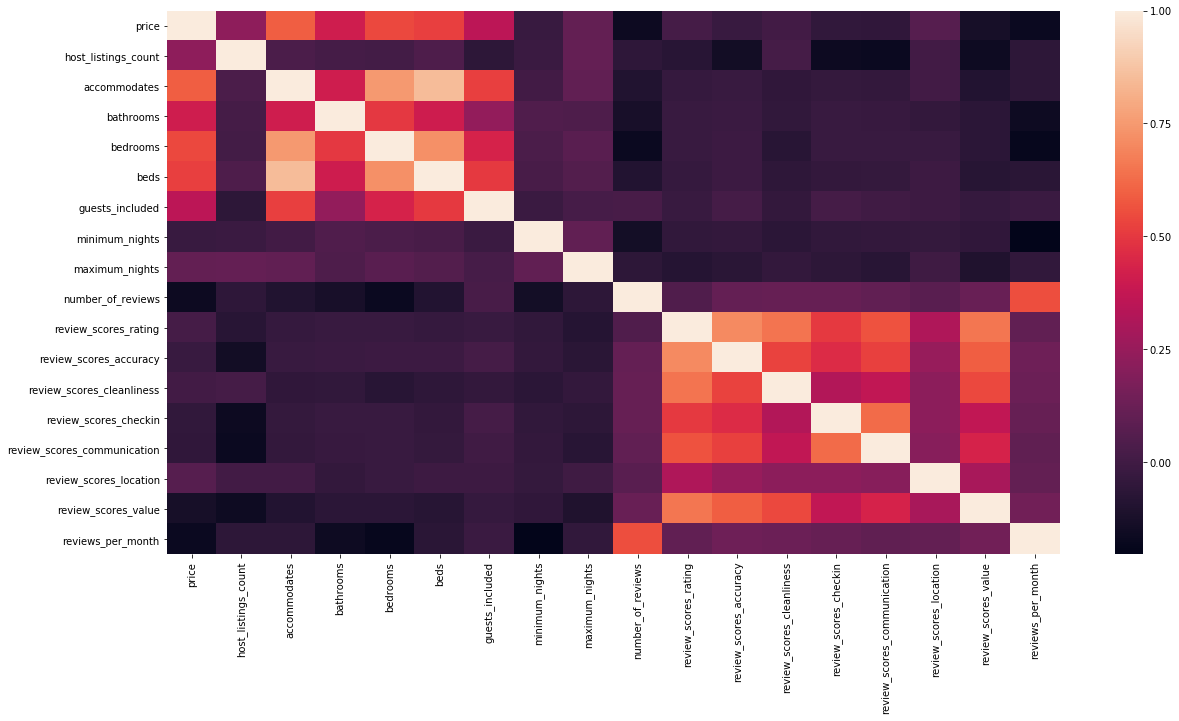

In [35]:
airbnb_cont_corr = airbnb_cont[list(airbnb_cont.columns)[1:]]
corr = airbnb_cont_corr.corr()
sns.heatmap(corr, 
  xticklabels=corr.columns,
  yticklabels=corr.columns)
plt.show()

With regards to continuous variables, the highest correlations to listing price are related to how many guests fit in the accomodation: number of bathrooms, bedrooms, beds, and how many guests are included.

Do high overall reviews lead to a higher cost in price per night?

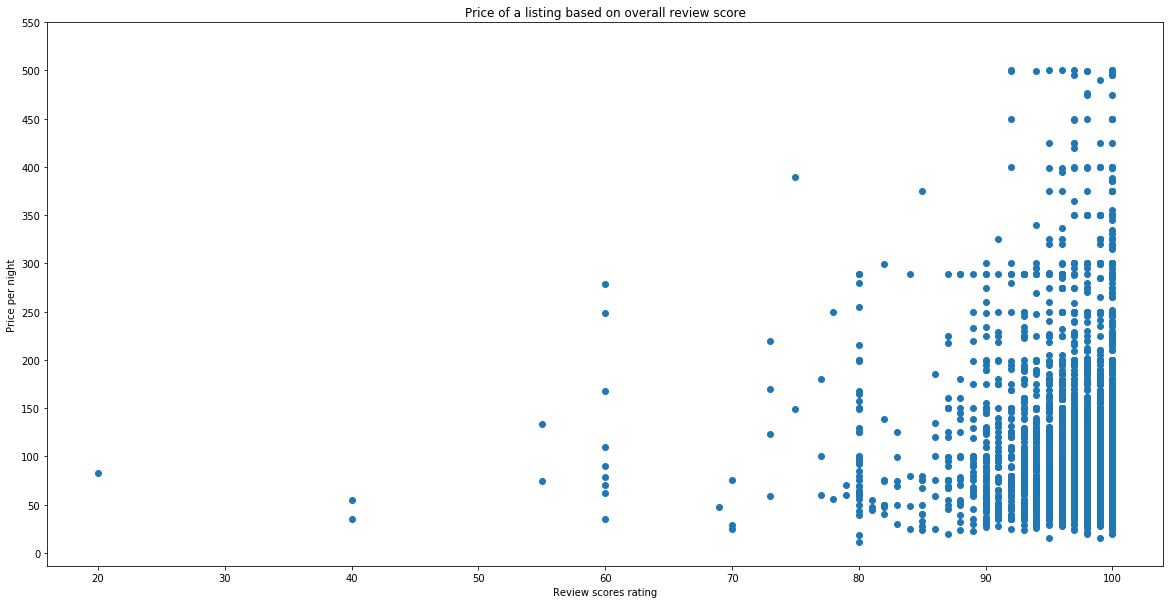

In [37]:
plt.scatter(x='review_scores_rating', y='price', data=airbnb)
plt.xlabel("Review scores rating")
plt.ylabel("Price per night")
plt.title("Price of a listing based on overall review score")
plt.yticks(np.arange(0, 600, step=50))
plt.show()

It looks like what you pay for is not necessarily what you get. Though you can expect greater than a 90% overall satisfaction if you pay between 450 - 500 USD, 100% positive score is found throughout the entire price spectrum. Therefore, a host will want to work very hard in keeping their guests happy if they wish to remain competitive in the market, regardless of lodging cost.

In [38]:
# discrete
# this seems to be the wrong way to obtain the opposite columns of airbnb_cont

airbnb_cat = full_OR_airbnb.drop(columns=list(airbnb_cont.columns))
airbnb_cat.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,...,availability_60,availability_90,availability_365,calendar_last_scraped,first_review,last_review,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,https://www.airbnb.com/rooms/7893,20181107122123,2018-11-07,North Williams 2brm Home,"Located on Williams bike corridor, some of Por...",This NE Portland 2 bedroom home is located jus...,"Located on Williams bike corridor, some of Por...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,35,35,2018-11-07,2010-02-22,2014-08-12,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,flexible,f,f,1
1,https://www.airbnb.com/rooms/12899,20181107122123,2018-11-07,"Alberta Arts 2 bedroom suite, charming 1906 house",Settle in to a space of your own. You'll have ...,We live in a neighborhood of beautiful gardens...,Settle in to a space of your own. You'll have ...,none,We're within walking distance of a grocery and...,We welcome musicians and even have a guitar fo...,Parking is readily available in front of our h...,"Guests have the whole upstairs, two bedrooms, ...",We let our guests determine their level of int...,Please no smoking. The space is not child-proo...,NaN,...,34,37,303,2018-11-07,2010-01-24,2018-10-21,t,14-218887-000-00-HO,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,moderate,f,f,1
2,https://www.airbnb.com/rooms/16688,20181107122123,2018-11-07,"Beautiful condo in downtown Pearl, NW Portland","Newly remodeled 2 bedroom (3 queen beds), 2 fu...","- Fully furnished condo with high ceilings, bi...","Newly remodeled 2 bedroom (3 queen beds), 2 fu...",none,Easily one of Portland’s most desirable neighb...,- Smoking is strictly prohibited - Must be abl...,"Walking distance to the public Light Rail, bus...",Our guests enjoy entire home to themselves. Di...,"Our guests can reach us via phone, text or email.",NaN,NaN,...,49,79,340,2018-11-07,2017-04-30,2018-11-04,t,2008-190040-000-00-RS,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",t,f,moderate,f,f,1
3,https://www.airbnb.com/rooms/25200,20181107122123,2018-11-07,Flamenco Dream :: hip mississippi ave.,"If you are an Urban Farming pioneer, enthusias...",The large farmhouse is surrounded by magical u...,"If you are an Urban Farming pioneer, enthusias...",none,Tierra Soul is located in the fun and hip Miss...,QUIET HOURS: (9pm -7am) We have guests from al...,"We are a 5 minute drive, and 10 minute MAX rid...",NaN,NaN,quiet-ish hours: 9pm - 7am this means we a...,NaN,...,60,90,180,2018-11-07,2010-06-07,2018-10-18,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,f,f,6
4,https://www.airbnb.com/rooms/26203,20181107122123,2018-11-07,Bluebird @ hip mississippi ave,"If you are an Urban Farming pioneer, enthusias...",The large farmhouse is surrounded by magical u...,"If you are an Urban Farming pioneer, enthusias...",none,We are located in the fun and hip Mississippi ...,QUIET HOURS: (9pm -7am) We have guests from al...,"We are a 5 minute drive, and 10 minute MAX rid...",NaN,NaN,quiet-ish hours: 9pm - 7am this means we a...,NaN,...,47,77,167,2018-11-07,2010-06-09,2018-09-30,t,NaN,"{OREGON,"" MULTNOMAH"","" PORTLAND""}",f,f,strict_14_with_grace_period,f,f,6


In [36]:
##########
# future work, mention text analytics NLP. proof reading. 
